In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = "datas/cell_data.csv"

In [3]:
df_train = pd.read_csv(train_path)

In [4]:
df_train.head(3)

,UID,X1,X2,CellType,Donor
0,4861STDY7462257-AAACCTGCATGGGAAC,6.308161,-3.586926,T,A16
1,4861STDY7462257-AAAGATGGTGTGACGA,2.006791,-7.994239,T,A16
2,4861STDY7462257-AACTCCCGTCCAAGTT,-6.246193,-6.825125,T,A16


In [5]:
#各細胞クラスタで一個前の細胞とのユークリッド距離の平均を求める


t_cell = df_train[df_train["CellType"] == "T"]
euclid = lambda x1,x2,y1,y2: ((x2 - x1)**2 + (y2 - y1)**2)**0.5
shift_index = 0

t_d = []
for x1, x2 in zip(t_cell["X1"][1:], t_cell["X2"][1:]):
    shift_x1 = list(t_cell["X1"])[shift_index]
    shift_x2 = list(t_cell["X2"])[shift_index]
    d = euclid(x1, x2, shift_x1, shift_x2)
    t_d.append(d)
    shift_index +=1
t_avg = sum(t_d)/len(t_d)

print("T細胞クラスター間の距離の平均: ", t_avg)

T細胞クラスター間の距離の平均:  10.17654795929943


In [6]:
b_cell = df_train[df_train["CellType"] == "B"]
euclid = lambda x1,x2,y1,y2: ((x2 - x1)**2 + (y2 - y1)**2)**0.5
shift_index = 0

b_d = []
for x1, x2 in zip(b_cell["X1"][1:], b_cell["X2"][1:]):
    shift_x1 = list(b_cell["X1"])[shift_index]
    shift_x2 = list(b_cell["X2"])[shift_index]
    d = euclid(x1, x2, shift_x1, shift_x2)
    b_d.append(d)
    shift_index +=1
b_avg = sum(b_d)/len(b_d)

print("B細胞クラスター間の距離の平均: ", b_avg)

B細胞クラスター間の距離の平均:  8.991816895162732


In [7]:
train_index = df_train.index

In [8]:
# データを正規化する

#平均
train_x1_avg =  sum(df_train["X1"])/ len(df_train["X1"])
train_x2_avg =  sum(df_train["X2"])/ len(df_train["X2"])
#分散
v_x1_train = sum([(i-train_x1_avg)**2 for i in df_train["X1"]])/ len(df_train["X1"])
v_x2_train = sum([(i-train_x2_avg)**2 for i in df_train["X2"]])/ len(df_train["X2"])
#標準偏差
s_x1_train=v_x1_train**0.5
s_x2_train=v_x2_train**0.5

print("train")
print("x1の平均: ", train_x1_avg)
print("x2の平均: ", train_x2_avg)
print("x1の分散: ", v_x1_train)
print("x2の分散: ", v_x2_train)
print("x1の標準偏差: ", s_x1_train)
print("x2の標準偏差: ", s_x2_train)

train
x1の平均:  1.064282762948052
x2の平均:  4.47105903691816
x1の分散:  23.769293141290273
x2の分散:  56.78121197256023
x1の標準偏差:  4.875376205103589
x2の標準偏差:  7.535330913275158


In [9]:
#データの標準化
z = lambda x, avg, s: (x-avg)/s





In [10]:
#x1とx2のデータを標準化
df_train.loc[:, "X1"] = [z(x, train_x1_avg, s_x1_train) for x in df_train["X1"]]
df_train.loc[:, "X2"] = [z(x, train_x2_avg, s_x2_train) for x in df_train["X2"]]


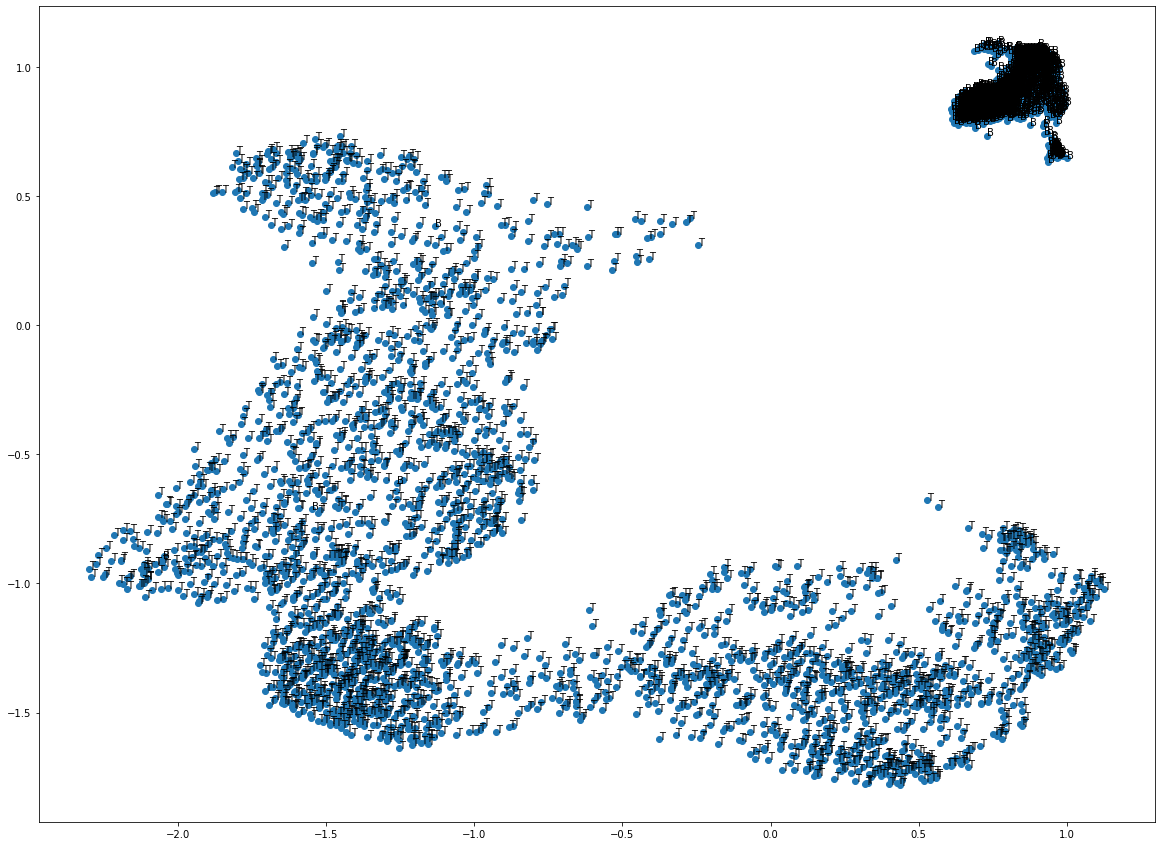

In [11]:
#データラベルを付与
x_y = [(x,y) for x, y in zip(df_train["X1"], df_train["X2"])]


plt.figure(figsize=(20.0, 15.0))
for label, coordinate in zip(df_train["CellType"], x_y):
    plt.annotate(label, (coordinate[0], coordinate[1]))
    
    
plt.scatter(df_train["X1"], df_train["X2"])
plt.show()

In [12]:
#train  TとBはいき値を設定することで分離可能

In [13]:
target_path = "datas/cell_data_additional.csv"

In [14]:
df_target = pd.read_csv(target_path)


In [15]:
df_target.head(3)

,UID,X1,X2
0,4861STDY7462257-AGCAGCCCACGAAAGC,-1.536547,-5.808322
1,4861STDY7462257-AGCGTCGTCTCTAAGG,4.265754,10.928544
2,4861STDY7462257-CAAGATCCAATAGAGT,4.729420,10.987251


In [16]:
# データを正規化する

#平均
target_x1_avg =  sum(df_target["X1"])/ len(df_target["X1"])
target_x2_avg =  sum(df_target["X2"])/ len(df_target["X2"])
#分散
v_x1_target = sum([(i-target_x1_avg)**2 for i in df_target["X1"]])/ len(df_target["X1"])
v_x2_target = sum([(i-target_x2_avg)**2 for i in df_target["X2"]])/ len(df_target["X2"])
#標準偏差
s_x1_target=v_x1_target**0.5
s_x2_target=v_x2_target**0.5

print("target")
print("x1の平均: ", target_x1_avg)
print("x2の平均: ", target_x2_avg)
print("x1の分散: ", v_x1_target)
print("x2の分散: ", v_x2_target)
print("x1の標準偏差: ", s_x1_target)
print("x2の標準偏差: ", s_x2_target)

target
x1の平均:  1.037678541712457
x2の平均:  4.741197394673071
x1の分散:  23.81183714488602
x2の分散:  55.552333812305704
x1の標準偏差:  4.879737405320702
x2の標準偏差:  7.453343800758536


In [17]:
#x1とx2のデータを標準化
df_target.loc[:, "X1"] = [z(x, target_x1_avg, s_x1_train) for x in df_target["X1"]]
df_target.loc[:, "X2"] = [z(x, target_x2_avg, s_x2_train) for x in df_target["X2"]]

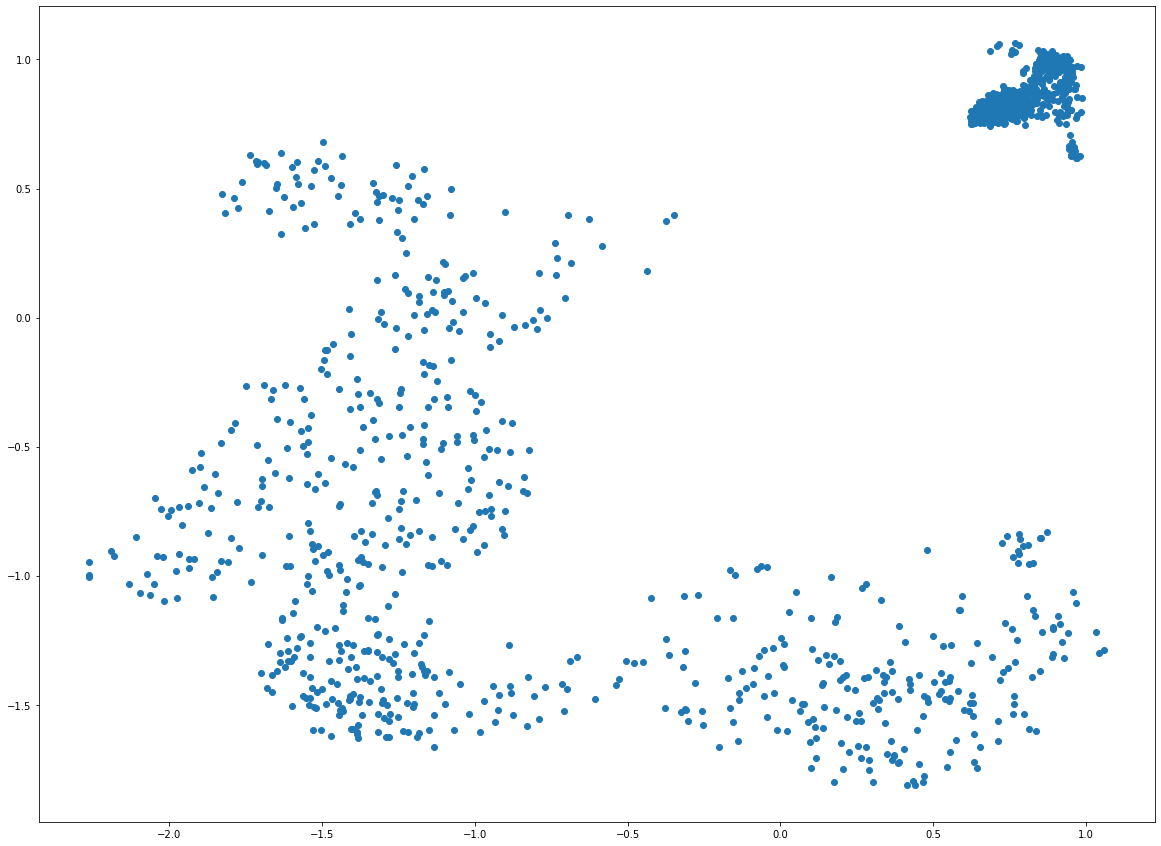

In [18]:
plt.figure(figsize=(20.0, 15.0))
plt.scatter(df_target["X1"], df_target["X2"])
plt.show()

In [19]:
#フィッシャーの線形判別分析

train_t = df_train[df_train["CellType"] == "T"]

x1_avg = sum(train_t["X1"])/len(train_t["X1"])
x2_avg = sum(train_t["X2"])/len(train_t["X2"])

print("T細胞平均: ", [x1_avg, x2_avg])

T細胞平均:  [-0.7689079201793204, -0.8846553323678049]


In [20]:
train_b = df_train[df_train["CellType"] == "B"]

x1_avg = sum(train_b["X1"])/len(train_b["X1"])
x2_avg = sum(train_b["X2"])/len(train_b["X2"])

print("B細胞平均: ", [x1_avg, x2_avg])

B細胞平均:  [0.7741049997344346, 0.8906347533368343]


In [21]:
#ラグランジュの未定乗数決定法

sw = np.zeros((2,2))
cls_T = [[x,y] for x, y in zip(train_t["X1"], train_t["X2"])] 
cls_T= np.array(cls_T)
mean_t = np.mean(cls_T, axis=0)
mean_t = mean_t.flatten() #1次元化
cls_B = [[x,y] for x, y in zip(train_b["X1"], train_b["X2"])]
mean_b = np.mean(cls_B, axis=0)
mean_b = mean_b.flatten() #1次元化
cls_B = np.array(cls_B)


#総クラス内共分散行列
for xn in cls_T:
    xn = xn.reshape(2, 1)
    mean_t = mean_t.reshape(2,1)
    sw += np.dot((xn-mean_t), (xn-mean_t).T)
for xn in cls_B:
    xn = xn.reshape(2, 1)
    mean_b = mean_b.reshape(2,1)
    sw += np.dot((xn-mean_b), (xn-mean_b).T)
#総クラス内共分散行列の逆行列
sw_inv = np.linalg.inv(sw)
#wを求める
w = np.dot(sw_inv,(mean_t-mean_b))
   


In [22]:
w

array([[-0.00126747],
       [-0.00212249]])

In [23]:
def f(x, a, b):
    return a*x+b


mean = (mean_t + mean_b)/2 #平均値の中点
a = -w[0]/w[1] #wと直交する
b = a*mean[0]+mean[1]
x = np.linspace(-1, 1, 5)
y = f(x,a,b)

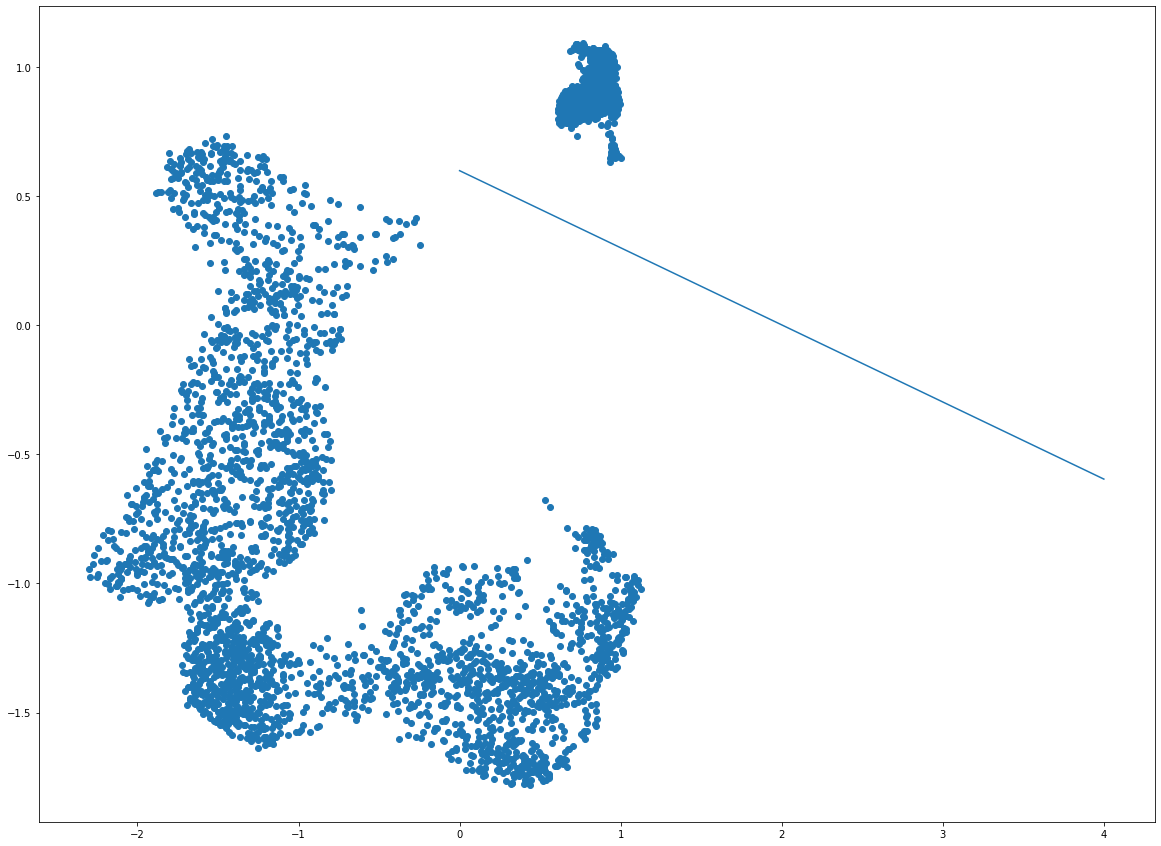

In [24]:
plt.figure(figsize=(20.0, 15.0))
plt.scatter(df_train["X1"], df_train["X2"])
plt.plot(y)
plt.show()

In [25]:
#怪しいけど引けてないとは言えないかなああ

In [26]:
w = w.flatten()
x = np.array([df_train["X1"], df_train["X2"]])
#wとxの内積を求める

s = w.dot(x) 

In [27]:
s

array([0.00090644, 0.0032661 , 0.00508235, ..., 0.00132616, 0.00123297,
       0.00430018])

In [28]:
# 決定境界と直行するベクトルWの内積を求めた結果
#Tがnegative(決定境界より下)
#Bがpositive(決定境界より上)

positive = 0
negative = 0
for i in s:
    if i > 0:
        positive += 1
    if i < 0:
        negative += 1
        
        

In [29]:
print("B細胞?: ", positive)
print("T細胞?: ", negative)

B細胞?:  2965
T細胞?:  2973


In [30]:
df_train.head(3)

,UID,X1,X2,CellType,Donor
0,4861STDY7462257-AAACCTGCATGGGAAC,1.075584,-1.069360,T,A16
1,4861STDY7462257-AAAGATGGTGTGACGA,0.193320,-1.654247,T,A16
2,4861STDY7462257-AACTCCCGTCCAAGTT,-1.499469,-1.499096,T,A16


In [31]:
df_train["CellType"].value_counts()

T    2979
B    2959
Name: CellType, dtype: int64

In [32]:


predict = []

for i in s:
    if i > 0:
        predict.append("T")
    if i < 0:
        predict.append("B")
     

In [33]:
df_train["PredictType"] = predict


In [34]:
df_train[["CellType", "PredictType"]]

,CellType,PredictType
0,T,T
1,T,T
2,T,T
3,T,T
4,T,T
...,...,...
5933,T,T
5934,T,T
5935,T,T
5936,T,T


In [35]:
df_train[df_train["CellType"] == "T"]["PredictType"].value_counts()

T    2961
B      18
Name: PredictType, dtype: int64

In [36]:
# 正解
2961/(2961+18)


0.9939577039274925

In [37]:
df_train[df_train["CellType"] == "B"]["PredictType"].value_counts()

B    2955
T       4
Name: PredictType, dtype: int64

In [38]:
# 正解
2955/(2955+18)


0.9939455095862765

In [39]:
#過学習してそう

In [40]:
#cell_data_additional.csv

# x1とx2からCellTypeを予測する

df_target.head()

,UID,X1,X2
0,4861STDY7462257-AGCAGCCCACGAAAGC,-0.528006,-1.400007
1,4861STDY7462257-AGCGTCGTCTCTAAGG,0.662118,0.821111
2,4861STDY7462257-CAAGATCCAATAGAGT,0.757222,0.828902
3,4861STDY7462257-CATATTCTCGCATGAT,0.763941,0.819265
4,4861STDY7462257-CATCGGGTCAGAGACG,0.795893,0.772759


In [41]:
print(w)

[-0.00126747 -0.00212249]


In [48]:
#trainで求めたwを利用
w = w.flatten()
x = np.array([df_target["X1"], df_target["X2"]])
#wとxの内積を求める

s = w.dot(x) 

In [49]:
s

array([ 0.00364073, -0.00258202, -0.00271909, ...,  0.00073044,
        0.00085649,  0.00045754])

In [50]:
predict = []

for i in s:
    if i > 0:
        predict.append("T")
    if i < 0:
        predict.append("B")
     

In [52]:
df_target["PredictCellType"] = predict

In [53]:
df_target["PredictCellType"].value_counts()

B    764
T    721
Name: PredictCellType, dtype: int64

In [55]:
#標準化前のデータに直す
target_path = "datas/cell_data_additional.csv"
df = pd.read_csv(target_path)

In [56]:
df["PredictCellType"] = predict

In [57]:
df.head()

,UID,X1,X2,PredictCellType
0,4861STDY7462257-AGCAGCCCACGAAAGC,-1.536547,-5.808322,T
1,4861STDY7462257-AGCGTCGTCTCTAAGG,4.265754,10.928544,B
2,4861STDY7462257-CAAGATCCAATAGAGT,4.729420,10.987251,B
3,4861STDY7462257-CATATTCTCGCATGAT,4.762176,10.914634,B
4,4861STDY7462257-CATCGGGTCAGAGACG,4.917956,10.564189,B


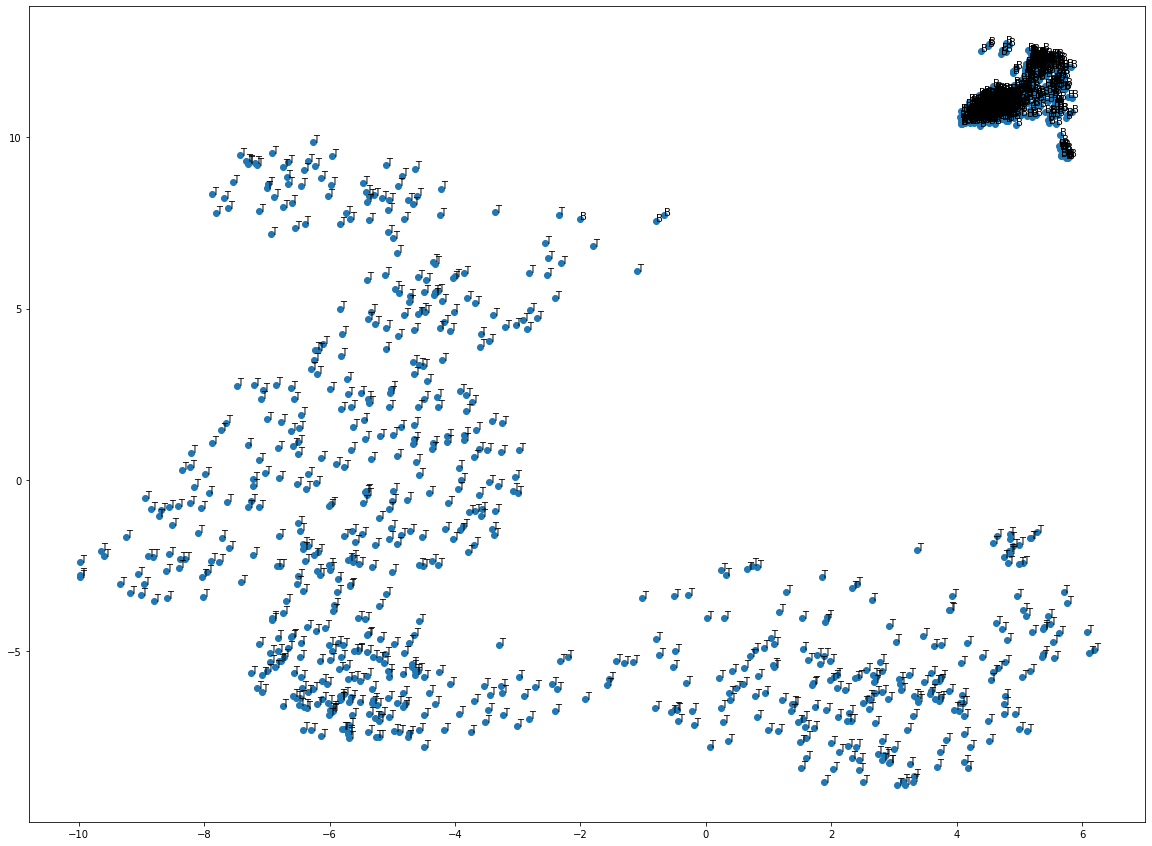

In [59]:
#一応図で確認
x_y = [(x,y) for x, y in zip(df["X1"], df["X2"])]


plt.figure(figsize=(20.0, 15.0))
for label, coordinate in zip(df["PredictCellType"], x_y):
    plt.annotate(label, (coordinate[0], coordinate[1]))
    
    
plt.scatter(df["X1"], df["X2"])
plt.show()

In [60]:
#多少誤差はあるよなあ

In [61]:
#txtで保存するらしい

In [63]:
df.to_csv("cell_type_predicted.txt", index=False)